# PEC 2. Introducción a los sistemas de recuperación de información.

En esta PEC vamos a desarrollar un sistema de recuperación de información básico. Partiendo de una lista de documentos de texto tendrás que usar las técnicas de recuperación de información vistas en la asignatura para obtener, procesar y analizar datos útiles a partir del contenido.




```
#TODO: nombre y apellidos
```







---

# **Parte 1**. Tareas básicas



Además de las ya clásicas `pandas` y `numpy`, vamos a utilizar la librería [NTLK](https://es.wikipedia.org/wiki/NLTK) (Natural Language Toolkit), una librería Python utilizada para analizar texto y aprendizaje automático.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\oliva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\oliva\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## 1.1 Separando las palabras (Tokenization)

El significado de cada sentencia se obtiene de las palabra que contiene. Así que analizando las palabras presentes en un texto se puede interpretar el significado. Así que lo primero que hay que hacer para poder tratar el texto es separar las palabras que lo componen, es decir, hacer una lista  de palabras. El modelo que vamos a utilizar aquí se denomina [**bolsa-de-palabras**](https://es.wikipedia.org/wiki/Modelo_bolsa_de_palabras) (bag-of-words) ya que nos interesan las palabras sin importar su posición o importancia en el documento.


La separación de las palabres o tokenization consiste en separar el texto en palabras, también denominados tokens. Generalmente el `espacio`se utiliza para separar palabras y elementos como los puntos, comas, dos puntos, etc. se utilizan para separar sentencias.




Hay multiples formas de realizar la separación de palabras para un texto dado. 

### 1.1.1 Funciones de Python

Se puede usar la función `split()` para separar una cadena de texto en una lista de palabras. Por defecto `split()` utiliza el espacio en blanco, aunque se puede usar cualquier caracter.


In [2]:
text01 = "Children shouldn't drink a sugary drink before bed."
#Use function split to separate the text string into words
text01.split(' ')

['Children', "shouldn't", 'drink', 'a', 'sugary', 'drink', 'before', 'bed.']

El método `split()` de Python no considera los signos de puntuación como elementos separados.



### 1.1.2 Expresiones regulares

El módulo `re` ofrece un conjunto de funciones para buscar coincidencias en una cadena de texto. Una *expresión regular* es una secuencia de caracteres que definen un patrón de búsqueda.

In [3]:
import re

#Initialize the regular expressions variable with the search pattern
re_pattern = '[a-zA-Z]+'
text02 = """There are multiple ways we can perform tokenization on given text data. We can choose any method based on language, library and purpose of modeling."""

#Split the text string into words applying the regular expression
tokens = re.findall(re_pattern, text02,flags=re.IGNORECASE) # TODO: usar una expresión regular para separar las palabras
print(tokens)

['There', 'are', 'multiple', 'ways', 'we', 'can', 'perform', 'tokenization', 'on', 'given', 'text', 'data', 'We', 'can', 'choose', 'any', 'method', 'based', 'on', 'language', 'library', 'and', 'purpose', 'of', 'modeling']


### 1.1.3 Con NLTK

Natural Language Toolkit (NLTK) tiene la función `word_tokenize()` para separación de palabras y `sent_tokenize()` para separación de sentencias.



In [4]:
from nltk.tokenize import sent_tokenize, word_tokenize

text03 = "<p>This is the first sentence. A gallon-of-milk in the U.S. costs $2.99. Is this the third sentence? Yes, it is!</p>"

# Split the text string into sentences
sentences = sent_tokenize(text03)
for sent in sentences: # TODO: separar las sentencias 
    print (sent)
    # Split the sentences into words
    words = word_tokenize(sent)
    for word in words:# TODO: separar las palabras
        print (word)

<p>This is the first sentence.
<
p
>
This
is
the
first
sentence
.
A gallon-of-milk in the U.S. costs $2.99.
A
gallon-of-milk
in
the
U.S.
costs
$
2.99
.
Is this the third sentence?
Is
this
the
third
sentence
?
Yes, it is!</p>
Yes
,
it
is
!
<
/p
>


## 1.2. Eliminación de números y símbolos. Conversión a minúsculas.

Como se puede comprobar, `word_tokenizer()` mantiene los signos de puntuación así como los los números y otros símbolos.

Una estrategia para reducir el número de palabras/tokens es convertirlas a minúsculas, pues algunos signos de puntuación modifican la letra inicial de las palabras. Así se consigue reducir el número de variantes de una misma palabra.




In [5]:
import string

def remove_tags (s):# TODO: eliminar tags html
    #Initialize the regular expressions variable with the search pattern
    clean = '<.*?>'
    # Applied the regular expression to eliminate html tags
    return re.sub(clean, '', s)


# TODO : eliminar tags, tokenizar, convertir a minúsculas y eliminar símbolos no alfabéticos y números 
def tokenize_and_remove_punctuations(s):
        
        string_witout_tags= remove_tags (s)
        tokens = str(word_tokenize(string_witout_tags))
        lower_case = tokens.lower()
        return(re.findall("\w+[a-z]", lower_case))
print ((tokenize_and_remove_punctuations (text03))) 

['this', 'is', 'the', 'first', 'sentence', 'gallon', 'of', 'milk', 'in', 'the', 'costs', 'is', 'this', 'the', 'third', 'sentence', 'yes', 'it', 'is']


## 1.3. Palabras vacías

Las *palabras vacías* (stopwords) son palabras más comunes en cualquier lenguaje, tienen sentido gramatical pero con poco significado para el análisis de un texto. Estas palabras vacías se incluyen artículos, preposiciones, conjunciones, pronombres, etc. así que su eliminación reduce considerablemente el número de palabras.

NLTK tiene listas de palabras vacías en 16 idiomas. En este caso, se ha cargado la lista en inglés.



In [6]:
# TODO : dada una lista de tokens, suprimir aquellos que sean palabras vacías 
#        o que su longitud es menor o igual 2

import nltk
def remove_stop_words(tokens):
    # Get the stop words    
    stopwords = nltk.corpus.stopwords.words('english')
    #Filter stop words and words with a longitude less than 2
    filtered_words =[word for word in tokens if (not word in stopwords and len(word)> 2) ] # TODO
    return filtered_words

remove_stop_words ( tokenize_and_remove_punctuations (text03)  )


['first', 'sentence', 'gallon', 'milk', 'costs', 'third', 'sentence', 'yes']

## 1.4. Normalización

Muchos idiomas contienen palabras derivadas de otras y esto se denomina [flexión](https://es.wikipedia.org/wiki/Flexi%C3%B3n_(ling%C3%BC%C3%ADstica)). La flexión es la modificación de una para expresar diferentes categorías gramaticales como persona, número, género, etc.

Tratar esta flexión para llevar las palabras a una forma base se denomina **normalización de palabras**. La normalización permite que si se busca por una palabra se haga al mismo tiempo por todas sus flexiones.

La **lematización** es el proceso de reducir la inflexión de las palabras para llevarla a su forma origen o raíz. El lema es la parte de la palabra a la que se añade la flexión.

En NLTK hay disponibles diferentes lematizadores aunque aquí vamos a utilizar el más conocido: [algoritmo de Porter](https://es.wikipedia.org/wiki/Algoritmo_de_Porter). 


Podéis ver algo más de estos procesos en 
https://www.datacamp.com/community/tutorials/stemming-lemmatization-python

In [7]:

from nltk.stem import PorterStemmer

def stem_words(tokens):
    #Create stemmer 
    stemmer = PorterStemmer()
    # Applied stemmer from tokens 
    stemmed_words = [stemmer.stem(word) for word in tokens] # TODO : obtener la versión básica de todos los tokens
    return stemmed_words

stem_words ( remove_stop_words(tokenize_and_remove_punctuations (text03)) )

['first', 'sentenc', 'gallon', 'milk', 'cost', 'third', 'sentenc', 'ye']

Una vez que ya están realizadas las operaciones básicas sobre el texto, es momento de ponerlo todo junto en la función `preprocess_data ()` que recibe un array de pares `(documentId, text)` y aplica las transformaciones anteriormente descritas.

In [195]:
def preprocess_text ( text , stem=True):
    if stem == True:
        # Preprocess with stem
        tokens = stem_words ( remove_stop_words(tokenize_and_remove_punctuations (text)) )       # TODO
    else: 
        # Preprocess without stem
        tokens = remove_stop_words(tokenize_and_remove_punctuations (text))
    return tokens 

def preprocess_data(contents, stem=True):
    dataDict = {}
    for content in contents:
        dataDict[content[0]] = preprocess_text(content[1], stem)
    return dataDict


In [196]:
document_1 = "A simple hello world test for the world"
document_2 = "What a wonderful world this is :-)"
document_3 = "This document is about the Java Language"
document_4 = "Before I write more about this I need a cup of coffee"
document_5 = "How to write Hello World in Java"
documents = [document_1, document_2, document_3, document_4, document_5]

docIds = ['doc01','doc02','doc03','doc04','doc05']

# Get iterator from two iterables 
documents_list =  zip(docIds,documents) # TODO : generar una lista de la forma  [('doc01', 'I love..'), ... ]

# Preprocess the document list
data_docs = preprocess_data(documents_list, True) # TODO : preprocesar la lista de documentos de ejemplo
#Print dictionary 
print(data_docs['doc01'])
print(data_docs['doc02'])
print(data_docs['doc03'])
print(data_docs['doc04'])
print(data_docs['doc05'])

['simpl', 'hello', 'world', 'test', 'world']
['wonder', 'world']
['document', 'java', 'languag']
['write', 'need', 'cup', 'coffe']
['write', 'hello', 'world', 'java']


## 1.5. Frecuencia de las palabras


Ahora vamos a ver cómo de importante es una palabra/token en los documentos. 

Lo primero que hay que hacer es obtener un vocabulario que no es más que la lista de todos los tokens únicos que aparecen en todos los documentos.



In [197]:
def get_vocabulary(data):
    tokens = []
    
    # loop through words list of each document
    for words in data.values():
        # loop through word of each list
        for word in words:
            if not word in tokens:
                # Add if  the word is not in the list tokens
                tokens.append(word)
    return list(tokens)

get_vocabulary ( data_docs)


['simpl',
 'hello',
 'world',
 'test',
 'wonder',
 'document',
 'java',
 'languag',
 'write',
 'need',
 'cup',
 'coffe']

Para ello podemos calcular la frecuencia de cada término contando el número de veces que aparece en cada documento, que será una medida de su peso o importancia.

$TF (t,d) = f_{t,d}$  (#número de repeticiones del término $t$ en el documento $d$)

In [198]:
from nltk.probability import FreqDist

def calculate_tf(tokens):
    tf_score = {}
    freq=FreqDist(tokens)
    #loop through word of each list
    for word,val in freq.items():
        if not word in tf_score:
            # Initialize the found word
            tf_score[word]=val/sum(freq.values())
        else:
            # Increase the counter 
            tf_score[word]+=val/sum(freq.values())
    return tf_score

fdist = calculate_tf ( data_docs['doc04'])
fdist
    

{'write': 0.25, 'need': 0.25, 'cup': 0.25, 'coffe': 0.25}

La **frecuencia inversa de documentos** para un término $t$ es el logaritmo (en este caso en base 2) del cociente entre el número de documentos y el número de documentos en los que aparece el término $t$.


$ IDF (t) = log_{2} \frac{N}{\{d \in D : t \in d \}} $

A mayor puntuación de TF*IDF el término es más específico y a menor puntuación, más genérico.

In [199]:
import math 

def calculate_idf(data):
    idf_score = {}
    N =  len(data.keys()) # TODO: número de documentos
    all_words = get_vocabulary ( data_docs) # TODO: obtener el vocabulario
    #loop through vocabulary list
    for w in all_words:
        #loop through documents
        for doc in data.values():
            #loop through document items 
            for term, val in doc.items():
                #Update our score  
                if term == w:  
                    if not w in idf_score:
                        # Initialize the found word
                        idf_score[w]=val
                    else:
                        # Increase the counter 
                        idf_score[w]+=val
        # Applied the formula
        idf_score[w]=math.log2(N/idf_score[w])
    return idf_score

fdist = [calculate_tf ( tokens) for tokens in data_docs.values()]
fdist_dict = dict(zip(data_docs.keys(),fdist))
idf_score = calculate_idf (fdist_dict)
idf_score

{'simpl': 4.643856189774724,
 'hello': 3.473931188332412,
 'world': 2.120294233717712,
 'test': 4.643856189774724,
 'wonder': 3.321928094887362,
 'document': 3.9068905956085187,
 'java': 3.0995356735509145,
 'languag': 3.9068905956085187,
 'write': 3.321928094887362,
 'need': 4.321928094887363,
 'cup': 4.321928094887363,
 'coffe': 4.321928094887363}

In [200]:
def calculate_tfidf(data, idf_score):
    scores = {}
    #loop through idf document list
    for doc in fdist_dict.values():
        #loop through idf term lis
        for term, val in doc.items():
            # Calculate the tf*idf
            if term in data:
                scores[term]=val*idf_score[term]
    return scores

ftfidf = [calculate_tfidf ( doc,idf_score) for doc in data_docs.values()]
ftfidf_dict = dict(zip(data_docs.keys(),ftfidf))
ftfidf_dict


{'doc01': {'simpl': 0.9287712379549449,
  'hello': 0.868482797083103,
  'world': 0.530073558429428,
  'test': 0.9287712379549449},
 'doc02': {'world': 0.530073558429428, 'wonder': 1.660964047443681},
 'doc03': {'document': 1.3022968652028395,
  'java': 0.7748839183877286,
  'languag': 1.3022968652028395},
 'doc04': {'write': 0.8304820237218405,
  'need': 1.0804820237218407,
  'cup': 1.0804820237218407,
  'coffe': 1.0804820237218407},
 'doc05': {'hello': 0.868482797083103,
  'world': 0.530073558429428,
  'java': 0.7748839183877286,
  'write': 0.8304820237218405}}

## 1.6. Generar el espacio vectorial

Usando las funciones anteriores vamos a construir la matriz de documentos (en filas) y términos (en columnas). Para facilitar la tarea usaremos una estructura de datos ya conocida, el **dataframe**.


In [193]:
import pandas as pd

def generate_dataframe ( data ):
    
    all_words = get_vocabulary ( data) # TODO : obtener el vocabulario

    #loop through documents to obtain the tf*idf list     
    ftfidf = [calculate_tfidf ( doc,idf_score) for doc in data.values()]# TODO: calcular tf*idf
    
    #Build and return dataframe
    df = pd.DataFrame ( ftfidf, index=data.keys()) 
    return df

df_data = generate_dataframe (data_docs)
df_data.head(5)

,simpl,hello,world,test,wonder,document,java,languag,write,need,cup,coffe
doc01,0.928771,0.868483,0.530074,0.928771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
doc02,NaN,NaN,0.530074,NaN,1.660964,NaN,NaN,NaN,NaN,NaN,NaN,NaN
doc03,NaN,NaN,NaN,NaN,NaN,1.302297,0.774884,1.302297,NaN,NaN,NaN,NaN
doc04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.830482,1.080482,1.080482,1.080482
doc05,NaN,0.868483,0.530074,NaN,NaN,NaN,0.774884,NaN,0.830482,NaN,NaN,NaN


## 1.7. Generar el índice invertido

De manera similar, vamos a generar un índice invertido que almacenaremos en una estructura de datos Python: el **diccionario**.




In [203]:
import pandas as pd

def generate_inverted_index(data):

    all_words = get_vocabulary ( data) # TODO : obtener el vocabulario
    
     #loop through documents to obtain the tf*idf list  
    ftfidf = [calculate_tfidf ( doc,idf_score) for doc in data.values()]# TODO: calcular tf*idf
    
    #Build and return inverted dataframe
    df = pd.DataFrame ( ftfidf, index=data.keys()) 
    return df.T

inverted_index = generate_inverted_index (data_docs)
inverted_index

,doc01,doc02,doc03,doc04,doc05
simpl,0.928771,NaN,NaN,NaN,NaN
hello,0.868483,NaN,NaN,NaN,0.868483
world,0.530074,0.530074,NaN,NaN,0.530074
test,0.928771,NaN,NaN,NaN,NaN
wonder,NaN,1.660964,NaN,NaN,NaN
document,NaN,NaN,1.302297,NaN,NaN
java,NaN,NaN,0.774884,NaN,0.774884
languag,NaN,NaN,1.302297,NaN,NaN
write,NaN,NaN,NaN,0.830482,0.830482
need,NaN,NaN,NaN,1.080482,NaN


## 1.8. Resolución de consultas



Vamos a resolver consultas (obtener los documentos más relevantes) considerando la consulta como un vector y comparándolo con el conjunto de documentos mediante la **similitud del coseno**. 

Para ello vamos a utilizar la librería [sklearn](https://scikit-learn.org/stable/), aunque sólo la funcionalidad para calcular la similitud del coseno. 

In [204]:
# generar un dataframe para la consulta

q = "hello world"

def generate_query_dataframe ( vocabulary , q ):
    table={}
    q_dict =   preprocess_text(q, True)  # TODO : preprocesar las palabras de la consulta
    
    #loop through vocabulary 
    for tokens in vocabulary:
        #Check if vabulary token is in the query 
        if tokens in q_dict:
           table[tokens]=1
        else:
           table[tokens]=0
    #Build and return dataframe
    df = pd.DataFrame ( table , index ={'q1'} )
    return df 

#Call the function and show the result
df_query =  generate_query_dataframe ( get_vocabulary(data_docs)  , q )
df_query.head(10)

,simpl,hello,world,test,wonder,document,java,languag,write,need,cup,coffe
q1,0,1,1,0,0,0,0,0,0,0,0,0


In [205]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

%time q_cossim = cosine_similarity(df_query) #TODO : calcular la similitud del coseno e indicar qué documento es el más próximo a la consulta

print (q_cossim.flatten())
ind = np.unravel_index ( np.argmax(q_cossim, axis=None), q_cossim.shape)
print ('Documento más similar : %s (%s) ' %  (documents[ind[0]],docIds[ind[0]]) )

Wall time: 4 ms
[1.]
Documento más similar : A simple hello world test for the world (doc01) 


# Parte 2. Stack Overflow

Stack Overflow es un sitio de preguntas y respuestas para programadores profesionales y aficionados. Contiene preguntas y respuestas sobre una amplia gama de temas de programación.

En este ejercicio vamos a usar en subconjunto del dataset original que contiene 500 posts. El dataset se obtiene del volcado de Stack Overflow en Big Query de Google.

Lo primero que hay que hacer es leer línea por línea el archivo JSON `stackoverflow-test.json` y meterlo en lun DataFrame de pandas. (Nota: `lines=True` indica que se trate cada línea como una cadena json) 

In [18]:
#from google.colab import files # subir archivo
#uploaded = files.upload()

In [19]:
#Get the data from our JSON file
stackoverflow_df = pd.read_json('stackoverflow.json',lines=True) # TODO

In [20]:
#Print the first 5
stackoverflow_df.head(5)

,id,title,body,accepted_answer_id,answer_count,comment_count,creation_date,last_activity_date,last_edit_date,last_editor_display_name,last_editor_user_id,owner_display_name,owner_user_id,post_type_id,score,tags,view_count,favorite_count
0,3247246,Integrate War-Plugin for m2eclipse into Eclips...,<p>I set up a small web project with JSF and M...,3247526.0,2,0,2010-07-14 14:39:48.053 UTC,2010-07-14 16:02:19.683 UTC,2010-07-14 15:56:37.803 UTC,,70604.0,,389430.0,1,2,eclipse|maven-2|tomcat|m2eclipse,1653,NaN
1,40270764,phantomjs-node page.evaulate seems to hang,<p>I have an implementation of 'waitfor' with ...,NaN,1,0,2016-10-26 19:35:00.537 UTC,2016-11-02 20:05:09.143 UTC,NaN,,NaN,,245076.0,1,0,node.js|phantomjs,35,NaN
2,27532383,Dynamic operations can only be performed in ho...,<p>I'm working with an API that requires:</p>\...,NaN,1,0,2014-12-17 18:31:18.6 UTC,2014-12-17 19:57:43.443 UTC,NaN,,NaN,,3105880.0,1,1,c#|asp.net-mvc,4372,NaN
3,33511888,CSS with relative URL to background image?,<p>I have a file structure of:</p>\n\n<pre><co...,NaN,2,2,2015-11-04 00:50:35.223 UTC,2015-11-04 01:51:03.037 UTC,2015-11-04 01:51:03.037 UTC,,5464492.0,,5464492.0,1,0,css|background-image,406,NaN
4,46160163,Share canvas image on android,<p>Hello so I write a small game where in the ...,46160246.0,1,0,2017-09-11 16:19:18.32 UTC,2017-09-11 16:24:12.69 UTC,NaN,,NaN,,8570512.0,1,0,android|canvas|bitmap|share,52,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,44530513,Passing pointer to function value not changing,<pre><code>#include&lt;stdio.h&gt;\n\nvoid foo...,NaN,4,2,2017-06-13 20:02:22.257 UTC,2017-06-13 21:08:25.637 UTC,2017-06-13 20:05:04.34 UTC,,3684343.0,,6219266.0,1,0,c|pointers,62,NaN
146,17440509,Credit card number format,<p>I'm trying to create a nifty credit card nu...,17441497.0,2,4,2013-07-03 05:42:17.447 UTC,2013-09-20 12:10:16.083 UTC,NaN,,NaN,,262125.0,1,0,javascript|jquery|coffeescript,3616,NaN
147,495050,List of CSS features not supported by IE6,<p>I just finished slicing and coding a very n...,495077.0,9,3,2009-01-30 10:24:18.573 UTC,2015-01-31 23:30:38.3 UTC,2009-02-02 11:31:32.603 UTC,Bruno,17648.0,Bruno,17648.0,1,11,css|internet-explorer-6,7962,11.0
148,9356536,Getting 'CGI (LoadError)' when migrating Tumbl...,"<p>I am using RVM,</p>\n\n<pre><code>$ ruby -v...",10183090.0,1,1,2012-02-20 05:22:08.93 UTC,2012-04-16 23:28:10.047 UTC,NaN,,NaN,,1201104.0,1,3,ruby|cgi|tumblr|jekyll,411,NaN


**Examinar el dataset para ver qué dimensiones y qué tipos de datos contiene.**

In [21]:
# To show the dataframe dimmension 
stackoverflow_df.shape# TODO

(500, 18)

In [22]:
# To know the dataframe data type  
stackoverflow_df.dtypes# TODO

id                            int64
title                        object
body                         object
accepted_answer_id          float64
answer_count                  int64
comment_count                 int64
creation_date                object
last_activity_date           object
last_edit_date               object
last_editor_display_name     object
last_editor_user_id         float64
owner_display_name           object
owner_user_id               float64
post_type_id                  int64
score                         int64
tags                         object
view_count                    int64
favorite_count              float64
dtype: object

In [23]:
# To know if we have null values 
stackoverflow_df.isnull()# TODO# TODO

,id,title,body,accepted_answer_id,answer_count,comment_count,creation_date,last_activity_date,last_edit_date,last_editor_display_name,last_editor_user_id,owner_display_name,owner_user_id,post_type_id,score,tags,view_count,favorite_count
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,True
2,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,True
3,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
496,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True
497,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
498,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False


Observad que el dataset tiene 18 campos que incluyen título `title`, cuerpo `body`, `tags`, fechas y otros metadatos que no necesitaremos en esta ocasión. 




## Descubriendo los Tags


Comencemos por analizar el campo `tags` que son las etiquetas que se marcan para indicar el asunto de la consulta. Se observa que el campo almacena varias etiquetas dentro separadas por el caracter '|'.

Lo primero es ver cuántas etiquetas hay de promedio por pregunta:


In [24]:
# Get the number of labels with regular expression
stackoverflow_df['tags_count'] = stackoverflow_df['tags'].str.count(r'[|]') + 1 #TODO
stackoverflow_df['tags_count']
 

0      4
1      2
2      2
3      2
4      4
      ..
495    2
496    2
497    3
498    2
499    5
Name: tags_count, Length: 500, dtype: int64

Calcular el máximo, el mínimo y el promedio de elementos en el campo `tags`.

In [25]:
# Obtain the max, min, and mean  the number of tags with regular expression 
labels_max= stackoverflow_df['tags_count'].max()# TODO
labels_min= stackoverflow_df['tags_count'].min()
labels_mean= stackoverflow_df['tags_count'].mean()
print("maximum : %s , minimum : %d , mean : %d " %(labels_max,labels_min,labels_mean))


maximum : 5 , minimum : 1 , mean : 3 


## 2.1 Count Vectorizer

A continuación se necesita obtener un vocabulario de palabras usadas y comenzar el proceso de contabilización.

La **vectorización** es el proceso por el que se convierte una colección de textos en un vector de características numérico. El modelo que seguimos es el de bolsa de palabras o Bag-of-Words, donde los documentos se describen por las palabras que aparecen en el texto, ignorando su posición relativa o su importancia en el texto.

**CountVectorizer** convierte una colección de documentos en una matriz de contadores que son las apariciones de cada token en cada documento.

Comenzamos por el campo `tags`, usar un vectorizador para convertir los tags en una serie de elementos.

In [211]:
from sklearn.feature_extraction.text import CountVectorizer

#Get the bag of words
vectorizer = CountVectorizer().fit(stackoverflow_df['tags']) # TODO
tag_df = vectorizer.transform(stackoverflow_df['tags']) # TODO
tag_df.toarray()




array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

**Cuántos tags distintos hay en el dataset**

In [212]:
#Get the features names
feature_names = vectorizer.get_feature_names()
print("Number of rows :", len(tag_df.toarray())) #TODO
print("Number of unique tags :",len(feature_names))  # TODO

Number of rows : 500
Number of unique tags : 815


**¿Qué significado tienen estos tags?** 

In [213]:
#Get and print the tags
tags = vectorizer.get_feature_names()# TODO
print("Tags:", tags[:10])

Tags: ['04', '10', '11', '13', '2008', '2010', '3d', '64bit', 'access', 'achartengine']


Convertir en un DataFrame con 2 columnas: los diferentes tags localizados y la frecuencia con la que aparecen:

In [214]:
sum_words = tag_df.sum(axis=0) 

#loop through vocabulary to get frequency  
freqs = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
tags_df = pd.DataFrame(data=freqs)
tags_df.columns =['Tag', 'Count']
tags_df.head()

,Tag,Count
0,eclipse,6
1,maven,3
2,tomcat,1
3,m2eclipse,1
4,node,7


Obtener los tags que con más frecuencia aparecen en los documentos de StackOverflow:

In [215]:
 #Get the top 10 
tag_df_sorted = tags_df.sort_values(by=['Count'],ascending=False) # TODO
tag_df_top_10=tag_df_sorted.head(10)
print(tag_df_top_10)


            Tag  Count
13      android     62
18         java     53
39   javascript     51
40          php     47
47       python     38
8           net     37
197      jquery     36
7           asp     24
73          sql     24
110        html     22


**¿A qué tecnologías se refieren los tags más frecuentes?**

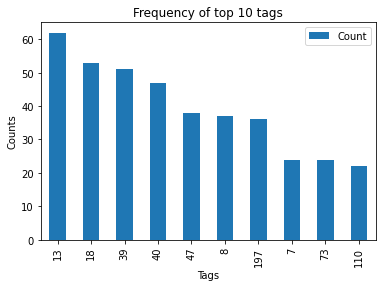

In [31]:
#Print the graphs
i=np.arange(10)
tag_df_sorted.head(10).plot(kind='bar')
plt.title('Frequency of top 10 tags')
#plt.xticks(i, tag_df_sorted['Tag'])
plt.xlabel('Tags')
plt.ylabel('Counts')
plt.show()

---

El interés se centra ahora en el cuerpo y en el título que forman la fuente de texto.Para ello vamos a crear un campo `text` que combina `title` y `body` en uno solo.

In [216]:
#Concat title and body colum and show the results 
stackoverflow_df['text'] =  stackoverflow_df['title'] + stackoverflow_df['body'] # TODO
stackoverflow_df['text'][3] 

"CSS with relative URL to background image?<p>I have a file structure of:</p>\n\n<pre><code>home.html\nimg/bg_damask1.jpg\ncss/style.css\n</code></pre>\n\n<p>When I set my body background image I can't get it to load. I've tried:</p>\n\n<pre><code>background-image: url('../img/bg_damask1.jpg');\nbackground-image: url('/img/bg_damask1.jpg');\nbackground-image: url('img/bg_damask1.jpg');\n</code></pre>\n\n<p>But none are working. How do I get my css to reference the background image?</p>\n\n<p>ETA: In browser dev tools I see that no matter what file path I put in, the browser is only referencing 'bg_damask1.jpg' without the file path. If I edit it in dev tools the image shows up using option #1. Now I'm stumped as to what's causing the breakdown.</p>"

Como se puede observar el texto contiene bastante "ruido" y es necesario procesarlo para que pueda ser útil. Hay que conseguir una cadena de texto en el que se eliminen palabras vacías, tags de html, carácteres extraños, etc. 


No resulta recomendable lematizar las palabras en esta ocasión y tampoco incluir ciertas palabras como palabras vacías. Puedes poner un ejemplo de palabra vacía que sería conveniente tratar.

In [217]:
#Eliminate the noise 
stackoverflow_df['mtext'] = stackoverflow_df['text'].str.replace(r'<[^<>]*>', '', regex=True)   # TODO


In [218]:
stackoverflow_df.head(5)

,id,title,body,accepted_answer_id,answer_count,comment_count,creation_date,last_activity_date,last_edit_date,last_editor_display_name,...,owner_user_id,post_type_id,score,tags,view_count,favorite_count,tags_count,text,mtext,cluster
0,3247246,Integrate War-Plugin for m2eclipse into Eclips...,<p>I set up a small web project with JSF and M...,3247526.0,2,0,2010-07-14 14:39:48.053 UTC,2010-07-14 16:02:19.683 UTC,2010-07-14 15:56:37.803 UTC,,...,389430.0,1,2,eclipse|maven-2|tomcat|m2eclipse,1653,NaN,4,Integrate War-Plugin for m2eclipse into Eclips...,Integrate War-Plugin for m2eclipse into Eclips...,0
1,40270764,phantomjs-node page.evaulate seems to hang,<p>I have an implementation of 'waitfor' with ...,NaN,1,0,2016-10-26 19:35:00.537 UTC,2016-11-02 20:05:09.143 UTC,NaN,,...,245076.0,1,0,node.js|phantomjs,35,NaN,2,phantomjs-node page.evaulate seems to hang<p>I...,phantomjs-node page.evaulate seems to hangI ha...,1
2,27532383,Dynamic operations can only be performed in ho...,<p>I'm working with an API that requires:</p>\...,NaN,1,0,2014-12-17 18:31:18.6 UTC,2014-12-17 19:57:43.443 UTC,NaN,,...,3105880.0,1,1,c#|asp.net-mvc,4372,NaN,2,Dynamic operations can only be performed in ho...,Dynamic operations can only be performed in ho...,0
3,33511888,CSS with relative URL to background image?,<p>I have a file structure of:</p>\n\n<pre><co...,NaN,2,2,2015-11-04 00:50:35.223 UTC,2015-11-04 01:51:03.037 UTC,2015-11-04 01:51:03.037 UTC,,...,5464492.0,1,0,css|background-image,406,NaN,2,CSS with relative URL to background image?<p>I...,CSS with relative URL to background image?I ha...,0
4,46160163,Share canvas image on android,<p>Hello so I write a small game where in the ...,46160246.0,1,0,2017-09-11 16:19:18.32 UTC,2017-09-11 16:24:12.69 UTC,NaN,,...,8570512.0,1,0,android|canvas|bitmap|share,52,NaN,4,Share canvas image on android<p>Hello so I wri...,Share canvas image on androidHello so I write ...,0


Utilizando `CountVectorizer` determinar las frecuencias de las palabras en el texto combinado.

In [219]:
#Get the vector with 85% of accuracy 
vectorizer = CountVectorizer(stop_words='english',
                         strip_accents='unicode',
                         max_df=0.85) # max_df : eliminar si la palabra está en el 85% de los documentos
word_count_vector = vectorizer.fit(stackoverflow_df['mtext'])
word_count_vector = vectorizer.transform(stackoverflow_df['mtext']) # TODO : transformar el texto limpio

Una vez contabilizado el texto se pueden ver algunas palabras del vocabulario:

In [220]:
list(vectorizer.vocabulary_.keys())[:10]

['integrate',
 'war',
 'plugin',
 'm2eclipse',
 'eclipse',
 'projecti',
 'set',
 'small',
 'web',
 'project']

Las columnas de la matriz son las características o tokens detectados en el texto y se pueden ver con la función `get_feature_names_out()`.

In [221]:
print (vectorizer.get_feature_names_out()[-10:] )

vocabulary = vectorizer.get_feature_names_out()


['zii' 'zip' 'zipped' 'zipwith' 'zlib' 'zlibinflated' 'zoom' 'zoomed'
 'zygoteinit' 'δe']


El resultado es una matriz `sparse matrix` que representa las cuentas de las palabras. Cada columna representa una palabra en el vocabulario y cada fila representa un documento (un post) en el datataset y cada celda el números de apariciones de la palabra en el documento.

**¿Cuál es el tamaño del vocabulario?**


In [222]:
len(vocabulary)# TODO


9939

Por comodidad, podemos convertir la matriz en un DataFrame en el que las filas sean los documentos y las columnas el vocabulario:

In [223]:
#Build and print dataframe
wc_df = pd.DataFrame (word_count_vector.todense(), columns=vocabulary) # TODO
wc_df.head(10)


,00,000,0000,0000fff2,0000fff3,0001,000263,00103,0018c18,0027,...,zii,zip,zipped,zipwith,zlib,zlibinflated,zoom,zoomed,zygoteinit,δe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Con del DataFrame es más fácil hacer consultas. 

**¿En qué post de stackoverflow aparece más veces la palabra `sql`?**



In [224]:
sql_idx = wc_df['sql'].idxmax(axis = 0) 
stackoverflow_df [stackoverflow_df.index == sql_idx]

,id,title,body,accepted_answer_id,answer_count,comment_count,creation_date,last_activity_date,last_edit_date,last_editor_display_name,...,owner_user_id,post_type_id,score,tags,view_count,favorite_count,tags_count,text,mtext,cluster
261,38999345,BIGINT and INT comparison failure in spark sql,<p>I have a Hive table with the following defi...,NaN,1,0,2016-08-17 14:23:27.343 UTC,2016-08-17 15:11:07.683 UTC,NaN,,...,5948671.0,1,0,apache-spark|hive|apache-spark-sql,341,NaN,3,BIGINT and INT comparison failure in spark sql...,BIGINT and INT comparison failure in spark sql...,0


## 2.2 TF*IDF TfidfTransformer


Ya hemos visto en qué consiste el método $TF*IDF$. Con el objeto **TfidfTransformer** se pueden calcular las puntuaciones TF-IDF.

In [232]:
from sklearn.feature_extraction.text import TfidfTransformer
#Get the tf-idf matrix
transformer = TfidfTransformer (smooth_idf=True, use_idf=True)
tf_idf_matrix = transformer.fit_transform (word_count_vector) #TODO : transformar word_count_vector en tf*idf
tf_idf_matrix

<500x9939 sparse matrix of type '<class 'numpy.float64'>'
	with 29199 stored elements in Compressed Sparse Row format>

Este código ha generado una matriz de puntuaciones tf-idf. ¿Las dimensiones de esta matriz coinciden con la obtenida de `CountVectorize`?

In [233]:
#Show the dimmension 
print(tf_idf_matrix.shape) #TODO : YES 
print(word_count_vector.shape)


(500, 9939)
(500, 9939)


De la misma forma, vamos a convertir la matriz en un DataFrame:

In [234]:
#Build data frame and check that is working properly
tf_idf_df = pd.DataFrame (tf_idf_matrix.todense(),columns=vocabulary) # TODO
tf_idf_df[tf_idf_df['javascript']>0.1]['javascript']
tf_idf_df

,00,000,0000,0000fff2,0000fff3,0001,000263,00103,0018c18,0027,...,zii,zip,zipped,zipwith,zlib,zlibinflated,zoom,zoomed,zygoteinit,δe
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Es posible ordenar valores tf-idf en orden descendente:

In [235]:
#Build a sorted funtion for our matrix
def sort_coo(coo_matrix):
    tuples=zip(coo_matrix.col,coo_matrix.data)
    return sorted(tuples,key=lambda x:(x[1],x[0]),reverse=True)
# Sorted and print to check that is working
tf_idf_matrix=sort_coo(tf_idf_matrix.tocoo())
tf_idf_df.sort_values(by=['javascript'],ascending=False)
tf_idf_df['javascript'].nlargest(n=5)


339    0.242313
159    0.240018
395    0.211170
240    0.186058
338    0.141360
Name: javascript, dtype: float64

El objetivo a continuación es extraer las $n$ palabras clave (`keywords`) que mejor representen cada una de las cuestiones planteadas en los datos de stackoverflow, según las puntuaciones tf-idf.





In [236]:
def extract_topn_keywords (row, vocabulary, topn=5):
    sort_items=row[:topn]
    score_vals=[]
    feature_vals=[]
    
    # loop through td-idf list to update our score and feature list 
    for idx, score in sort_items:
        score_vals.append(round(score,3))
        feature_vals.append(vocabulary[idx])
        
    result = {}# TODO 
    
    # loop through feature list to build our top
    for idx in range(len(feature_vals)):
        result[feature_vals[idx]]=score_vals[idx]
    
    return result

# loop through td-idf list to test our function
for row in tf_idf_df[300:303].iterrows():

    print (extract_topn_keywords(tf_idf_matrix, vocabulary))

{'balance': 0.869, 'jar': 0.847, 'lampa': 0.801, 'title': 0.792, 'favicon': 0.784}
{'balance': 0.869, 'jar': 0.847, 'lampa': 0.801, 'title': 0.792, 'favicon': 0.784}
{'balance': 0.869, 'jar': 0.847, 'lampa': 0.801, 'title': 0.792, 'favicon': 0.784}


In [71]:
#stackoverflow_df['keywords'] = # TODO

In [237]:
stackoverflow_df.tail(5)

,id,title,body,accepted_answer_id,answer_count,comment_count,creation_date,last_activity_date,last_edit_date,last_editor_display_name,...,owner_user_id,post_type_id,score,tags,view_count,favorite_count,tags_count,text,mtext,cluster
495,5972679,Is there any .NET string.format compatible fun...,<p>Is there any .NET string.format compatible ...,6001444.0,1,8,2011-05-12 02:23:05.997 UTC,2011-05-14 11:16:16.3 UTC,2011-05-14 11:16:16.3 UTC,,...,26736.0,1,4,delphi|formatting,403,NaN,2,Is there any .NET string.format compatible fun...,Is there any .NET string.format compatible fun...,0
496,21473995,How to handle failed XPATH lookup in MSXML fro...,<p>I am parsing a piece of XML returned from a...,21512998.0,2,0,2014-01-31 06:41:50.217 UTC,2014-02-02 16:33:58.39 UTC,NaN,,...,274354.0,1,0,autoit|msxml,534,NaN,2,How to handle failed XPATH lookup in MSXML fro...,How to handle failed XPATH lookup in MSXML fro...,1
497,11279736,Logo Animation - Don't know where to begin,<p>I'm trying to have a cool little animation ...,11897603.0,2,2,2012-07-01 05:07:28.437 UTC,2013-02-12 12:19:48.26 UTC,2013-02-12 12:19:48.26 UTC,,...,1193321.0,1,1,android|opengl-es|android-animation,858,NaN,3,Logo Animation - Don't know where to begin<p>I...,Logo Animation - Don't know where to beginI'm ...,0
498,33005260,How to introduce a new variable in Coq?,<p>I was wondering if there is a way to introd...,33005343.0,3,0,2015-10-08 01:44:46.92 UTC,2015-10-08 16:10:57.683 UTC,NaN,,...,683218.0,1,2,coq|coq-tactic,933,2.0,2,How to introduce a new variable in Coq?<p>I wa...,How to introduce a new variable in Coq?I was w...,0
499,38318410,Facebook PHP SDK login and localhost,<p>I am trying to set FB SDK to work in my loc...,NaN,2,3,2016-07-12 00:58:03.357 UTC,2016-08-04 19:27:27.847 UTC,NaN,,...,5849229.0,1,0,php|facebook|sdk|facebook-javascript-sdk|faceb...,513,NaN,5,Facebook PHP SDK login and localhost<p>I am tr...,Facebook PHP SDK login and localhostI am tryin...,0


**¿Son muy diferentes las palabras (tags) obtenidos mediante este procedimiento de las iniciales en el campo `tags`?**

---


En esta última sección,  vamos a presentar el algoritmo de clustering [K-Means](https://en.wikipedia.org/wiki/K-means_clustering), un algoritmo de clustering no supervisado que nos va a agrupar las diferentes cuestiones planteadas en Stack Overflow en diferentes grupos.


El objetivo de K-Means es sencillo: agrupar datos similares y descubrir patrones subyacentes. Para lograr esto, K-Means busca un número fijo $k$ de centroides en el dataset. Un centroide es el centro de un cluster y un cluster es una collección de datos reunidos que tienen ciertas similitudes entre ellos. El ‘means’ se refiere al promediado de los datos encontrando el centroide. El algoritmo es no supervisado pues no tiene conocimiento de los grupos en el dataset, es decir, encontrará los grupos subyacentes en el dataset.

Vamos a ver cómo funciona K-Means para los datos de tf-idf:

In [238]:
from sklearn.cluster import KMeans

k = 5 
kmeans = KMeans(n_clusters=k).fit(tf_idf_df)


El algoritmo ha agrupado cada uno de los documentos en uno de los 5 cluster definidos:

In [239]:
kmeans.labels_ 

array([2, 2, 4, 4, 3, 1, 2, 3, 3, 0, 1, 3, 3, 1, 0, 2, 1, 1, 2, 2, 1, 3,
       1, 0, 0, 3, 4, 4, 1, 4, 3, 1, 3, 0, 3, 4, 1, 1, 1, 0, 2, 1, 0, 1,
       1, 3, 2, 1, 4, 2, 3, 3, 2, 2, 2, 3, 2, 0, 1, 3, 4, 3, 1, 1, 3, 4,
       0, 3, 2, 3, 2, 0, 1, 1, 3, 3, 3, 2, 2, 3, 4, 2, 2, 0, 2, 3, 1, 3,
       0, 2, 1, 2, 4, 2, 2, 2, 3, 3, 0, 3, 0, 3, 1, 2, 2, 2, 3, 3, 1, 1,
       0, 0, 2, 2, 0, 1, 3, 0, 1, 2, 3, 2, 4, 3, 3, 4, 1, 3, 2, 4, 4, 1,
       1, 4, 3, 2, 1, 2, 0, 2, 2, 4, 1, 3, 3, 3, 2, 2, 1, 2, 3, 3, 4, 3,
       3, 2, 3, 3, 1, 1, 0, 3, 3, 3, 2, 2, 4, 2, 4, 3, 1, 1, 3, 4, 4, 3,
       1, 3, 2, 0, 3, 3, 1, 2, 3, 3, 3, 4, 3, 0, 3, 1, 3, 0, 0, 3, 3, 0,
       2, 0, 2, 4, 0, 2, 2, 3, 2, 1, 3, 0, 3, 1, 3, 3, 1, 3, 3, 0, 2, 4,
       2, 4, 4, 1, 0, 1, 2, 0, 1, 3, 3, 3, 0, 2, 2, 2, 1, 2, 4, 0, 1, 2,
       1, 0, 1, 3, 1, 3, 1, 0, 2, 4, 1, 1, 3, 2, 3, 0, 3, 2, 0, 3, 4, 4,
       2, 3, 2, 0, 2, 0, 1, 4, 1, 1, 4, 0, 1, 2, 2, 2, 0, 0, 4, 0, 2, 1,
       1, 3, 2, 3, 0, 0, 2, 3, 2, 1, 1, 3, 2, 2, 2,

Una cuestión importante es que el parámetro que indica el número de cluster $k$ hay que proporcionárselo y no sabemos, a priori, cuántos clúster podría haber subyacentes.

Para ello vamos a realizar el proceso con varios valores de $k$ para ver cuál es más adecuado:

In [240]:
from sklearn.cluster import MiniBatchKMeans
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans =MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20) # TODO 
        kmeans_results [k] =kmeans.fit(data)   # TODO : poner en un diccionario
    return kmeans_results

kmeans_results = run_KMeans (12, tf_idf_df)
kmeans_results


{2: MiniBatchKMeans(batch_size=2048, init_size=1024, n_clusters=2, random_state=20),
 3: MiniBatchKMeans(batch_size=2048, init_size=1024, n_clusters=3, random_state=20),
 4: MiniBatchKMeans(batch_size=2048, init_size=1024, n_clusters=4, random_state=20),
 5: MiniBatchKMeans(batch_size=2048, init_size=1024, n_clusters=5, random_state=20),
 6: MiniBatchKMeans(batch_size=2048, init_size=1024, n_clusters=6, random_state=20),
 7: MiniBatchKMeans(batch_size=2048, init_size=1024, n_clusters=7, random_state=20),
 8: MiniBatchKMeans(batch_size=2048, init_size=1024, random_state=20),
 9: MiniBatchKMeans(batch_size=2048, init_size=1024, n_clusters=9, random_state=20),
 10: MiniBatchKMeans(batch_size=2048, init_size=1024, n_clusters=10, random_state=20),
 11: MiniBatchKMeans(batch_size=2048, init_size=1024, n_clusters=11, random_state=20),
 12: MiniBatchKMeans(batch_size=2048, init_size=1024, n_clusters=12, random_state=20)}

Para determinar cómo de cohesionado está un cluster en relación con los otros clusters existe una medida denominada silueta (silhouette) que nos indica precisamente esto:

In [242]:
from sklearn.metrics import silhouette_score
import operator
def silhouette(kmeans_dict, df, plot=False):
    sil = dict()
    for k, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) 
        sil[k] = silhouette_avg  # TODO: añadir a diccionario

    return sil

sil_results = silhouette ( kmeans_results, tf_idf_df )
print (sil_results)

# TODO: Qué valor de k obtiene el mejor valor de silueta 
best_k = max(sil_results.items(), key=operator.itemgetter(1))[1]
print(best_k)

{2: 0.010376018137626461, 3: 0.008663863184329197, 4: 0.01016286447021423, 5: 0.009794827896264128, 6: 0.010087202721185037, 7: 0.009231562463551172, 8: 0.008942605601158025, 9: 0.007333916069977502, 10: 0.00934880408454134, 11: -0.0028329794705839605, 12: 0.009797605827103319}
0.010376018137626461


**¿Cuál es el número de clúster óptimo para este dataset?**

Una vez obtenido el valor de cluster que mejor podría describir la agrupación de los datos, vamos a hacer una predicción sobre los datos con la función `fit_predict` con el objeto kmeans que corresponde a `best_k`:

In [243]:
prediction =max(sil_results.items(), key=operator.itemgetter(1))[0]   # TODO

In [244]:
kmeans =MiniBatchKMeans(n_clusters=prediction, init_size=1024, batch_size=2048, random_state=20) 
stackoverflow_df['cluster']  =kmeans.fit_predict(tf_idf_df)# TODO: añadir las predicciones a stackoverflow_df
stackoverflow_df.head(5)

,id,title,body,accepted_answer_id,answer_count,comment_count,creation_date,last_activity_date,last_edit_date,last_editor_display_name,...,owner_user_id,post_type_id,score,tags,view_count,favorite_count,tags_count,text,mtext,cluster
0,3247246,Integrate War-Plugin for m2eclipse into Eclips...,<p>I set up a small web project with JSF and M...,3247526.0,2,0,2010-07-14 14:39:48.053 UTC,2010-07-14 16:02:19.683 UTC,2010-07-14 15:56:37.803 UTC,,...,389430.0,1,2,eclipse|maven-2|tomcat|m2eclipse,1653,NaN,4,Integrate War-Plugin for m2eclipse into Eclips...,Integrate War-Plugin for m2eclipse into Eclips...,0
1,40270764,phantomjs-node page.evaulate seems to hang,<p>I have an implementation of 'waitfor' with ...,NaN,1,0,2016-10-26 19:35:00.537 UTC,2016-11-02 20:05:09.143 UTC,NaN,,...,245076.0,1,0,node.js|phantomjs,35,NaN,2,phantomjs-node page.evaulate seems to hang<p>I...,phantomjs-node page.evaulate seems to hangI ha...,1
2,27532383,Dynamic operations can only be performed in ho...,<p>I'm working with an API that requires:</p>\...,NaN,1,0,2014-12-17 18:31:18.6 UTC,2014-12-17 19:57:43.443 UTC,NaN,,...,3105880.0,1,1,c#|asp.net-mvc,4372,NaN,2,Dynamic operations can only be performed in ho...,Dynamic operations can only be performed in ho...,0
3,33511888,CSS with relative URL to background image?,<p>I have a file structure of:</p>\n\n<pre><co...,NaN,2,2,2015-11-04 00:50:35.223 UTC,2015-11-04 01:51:03.037 UTC,2015-11-04 01:51:03.037 UTC,,...,5464492.0,1,0,css|background-image,406,NaN,2,CSS with relative URL to background image?<p>I...,CSS with relative URL to background image?I ha...,0
4,46160163,Share canvas image on android,<p>Hello so I write a small game where in the ...,46160246.0,1,0,2017-09-11 16:19:18.32 UTC,2017-09-11 16:24:12.69 UTC,NaN,,...,8570512.0,1,0,android|canvas|bitmap|share,52,NaN,4,Share canvas image on android<p>Hello so I wri...,Share canvas image on androidHello so I write ...,0


Una vez definidos los clusters, vamos a ver cuáles son las palabras clave que definen cada uno de los clusters:

C:\Users\oliva\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


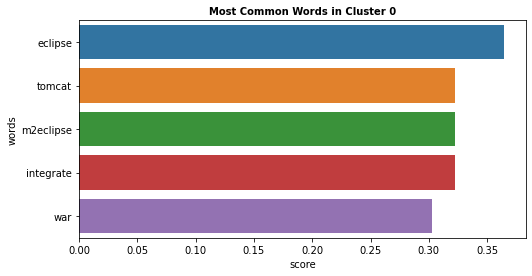

In [245]:
# Definir un par de funciones auxiliares
import seaborn as sns

def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # 
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # 
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # 
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['words', 'score'])
        dfs.append(df)
    return dfs


def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'words', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

n_feats = 5 # Num. palabras a representar
dfs = get_top_features_cluster(tf_idf_df.to_numpy(), prediction, n_feats)
plotWords(dfs, n_feats)  # 

**¿De qué tratan los post/preguntas/documentos que se encuentran en el cluster 0?**

---


# Parte 3. Ley Zipf

In [246]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\oliva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\oliva\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

NLTK incluye una pequeña selección de texto del Proyecto Gutenberg. Para poder acceder a los identificadores de los archivos:

In [247]:
nltk.download('gutenberg')
from nltk.corpus import gutenberg
gutenberg.fileids()


[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\oliva\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

Para poder acceder al texto de cada una de estas estas obras:


In [248]:
mobydick = gutenberg.raw('melville-moby_dick.txt')
mobydick = gutenberg.words('melville-moby_dick.txt')
print (gutenberg.words ('melville-moby_dick.txt')[0:150])
print(mobydick)


['[', 'Moby', 'Dick', 'by', 'Herman', 'Melville', '1851', ']', 'ETYMOLOGY', '.', '(', 'Supplied', 'by', 'a', 'Late', 'Consumptive', 'Usher', 'to', 'a', 'Grammar', 'School', ')', 'The', 'pale', 'Usher', '--', 'threadbare', 'in', 'coat', ',', 'heart', ',', 'body', ',', 'and', 'brain', ';', 'I', 'see', 'him', 'now', '.', 'He', 'was', 'ever', 'dusting', 'his', 'old', 'lexicons', 'and', 'grammars', ',', 'with', 'a', 'queer', 'handkerchief', ',', 'mockingly', 'embellished', 'with', 'all', 'the', 'gay', 'flags', 'of', 'all', 'the', 'known', 'nations', 'of', 'the', 'world', '.', 'He', 'loved', 'to', 'dust', 'his', 'old', 'grammars', ';', 'it', 'somehow', 'mildly', 'reminded', 'him', 'of', 'his', 'mortality', '.', '"', 'While', 'you', 'take', 'in', 'hand', 'to', 'school', 'others', ',', 'and', 'to', 'teach', 'them', 'by', 'what', 'name', 'a', 'whale', '-', 'fish', 'is', 'to', 'be', 'called', 'in', 'our', 'tongue', 'leaving', 'out', ',', 'through', 'ignorance', ',', 'the', 'letter', 'H', ',', 'w


La **ley Zipf** debe su nombre al lingüista norteamericano George Kingsley Zipf y dictamina que un pequeño número de palabras se utilizan todo el tiempo mientras que una gran mayoría de ellas apenas se utiliza. No es muy sorprendente que palabras muy frecuentes en textos en inglés sean `the`, `of` y similares, y que palabras como `intrauterine` apenas se utilicen. [https://en.wikipedia.org/wiki/Zipf%27s_law]

La ley Zipf puede escribirse de la siguiente forma: la $r$-ésima palabra más frecuente $f(r)$ escala según la fórmula: $f(r) \propto \frac{1}{r^{\alpha}}$ con $\alpha \approx 1$.


In [250]:
import operator
from nltk.probability import FreqDist

def topWordFrequencies ( text, top=50):
    # TODO
    fdist = nltk.FreqDist(w.lower() for w in text)
    fdist = fdist.most_common(top)
    

    return fdist
mobydick_freq = topWordFrequencies (mobydick , 20)
print(mobydick_freq)

[(',', 18713), ('the', 14431), ('.', 6862), ('of', 6609), ('and', 6430), ('a', 4736), ('to', 4625), ('in', 4172), (';', 4072), ('that', 3085), ("'", 2684), ('-', 2552), ('his', 2530), ('it', 2522), ('i', 2127), ('he', 1896), ('but', 1818), ('s', 1802), ('as', 1741), ('is', 1725)]


In [251]:
def createZipfTable(freqs):
    zipf_table = []
    top_frequency = freqs[0][1] # TODO

    for index, item in enumerate(freqs , start=1):
        relative_frequency = "1/{}".format(index)
        zipf_frequency = top_frequency * (1 / index)
        zipf_table.append({"word": item[0], "actual_frequency": item[1], "relative_frequency": relative_frequency , "zipf_frequency": zipf_frequency })

    return zipf_table


mobydick_zipf_table = createZipfTable (mobydick_freq)


print("|Rank|    Word    |       Freq | Zipf Frac  | Zipf Freq  |")
format_string = "|{:4}|{:12}|{:12.0f}|{:>12}|{:12.2f}|"
for index, item in enumerate(mobydick_zipf_table,start=1):
        print(format_string.format(index,
                                   item["word"],
                                   item["actual_frequency"],
                                   item["relative_frequency"],
                                   item["zipf_frequency"]))

|Rank|    Word    |       Freq | Zipf Frac  | Zipf Freq  |
|   1|,           |       18713|         1/1|    18713.00|
|   2|the         |       14431|         1/2|     9356.50|
|   3|.           |        6862|         1/3|     6237.67|
|   4|of          |        6609|         1/4|     4678.25|
|   5|and         |        6430|         1/5|     3742.60|
|   6|a           |        4736|         1/6|     3118.83|
|   7|to          |        4625|         1/7|     2673.29|
|   8|in          |        4172|         1/8|     2339.12|
|   9|;           |        4072|         1/9|     2079.22|
|  10|that        |        3085|        1/10|     1871.30|
|  11|'           |        2684|        1/11|     1701.18|
|  12|-           |        2552|        1/12|     1559.42|
|  13|his         |        2530|        1/13|     1439.46|
|  14|it          |        2522|        1/14|     1336.64|
|  15|i           |        2127|        1/15|     1247.53|
|  16|he          |        1896|        1/16|     1169.5

In [252]:
import numpy as np
import matplotlib.pyplot as plt


ranks = list (range ( 1, 1+len (mobydick_zipf_table) ))
frequencies = [ rec['actual_frequency']  for rec in mobydick_zipf_table ]
zipf_frequencies = [ rec['zipf_frequency'] for rec in mobydick_zipf_table ] 

plt.figure(figsize=(8,6))

plt.title("Word Frequencies:")
plt.ylabel("Total Number of Occurrences")
plt.xlabel("Rank of words")

plt.plot(
    ranks,
    frequencies, color='blue', label='Actual freq.',
    alpha=0.5
  )


plt.plot(
    ranks,
    zipf_frequencies, color="orange", label='Expected Zipf.',linestyle='--',
    alpha=0.5
  )

plt.legend()




Un factor que influye en la comprobación de la ley Zipf es el volumen del corpus. Si bien con un sólo documento, el cumplimiento de la ley Zipf es aproximado, veremos si como varios documentos es más exacto.

In [253]:
text = ''

for id in gutenberg.fileids(): # TODO cargar todos los documentos disponibles del Proj. Gutenberg
    num_chars = len(gutenberg.raw(id))
    num_words = len(gutenberg.words(id))
    num_sents = len(gutenberg.sents(id))
    num_vocab = len(set(w.lower() for w in gutenberg.words(id)))
    print(round(num_chars/num_words), round(num_words/num_sents), round(num_words/num_vocab), id)

    text = text + gutenberg.raw (id)


5 25 26 austen-emma.txt
5 26 17 austen-persuasion.txt
5 28 22 austen-sense.txt
4 34 79 bible-kjv.txt
5 19 5 blake-poems.txt
4 19 14 bryant-stories.txt
4 18 12 burgess-busterbrown.txt
4 20 13 carroll-alice.txt
5 20 12 chesterton-ball.txt
5 23 11 chesterton-brown.txt
5 19 11 chesterton-thursday.txt
4 21 25 edgeworth-parents.txt
5 26 15 melville-moby_dick.txt
5 52 11 milton-paradise.txt
4 12 9 shakespeare-caesar.txt
4 12 8 shakespeare-hamlet.txt
4 12 7 shakespeare-macbeth.txt
5 36 12 whitman-leaves.txt


11793318


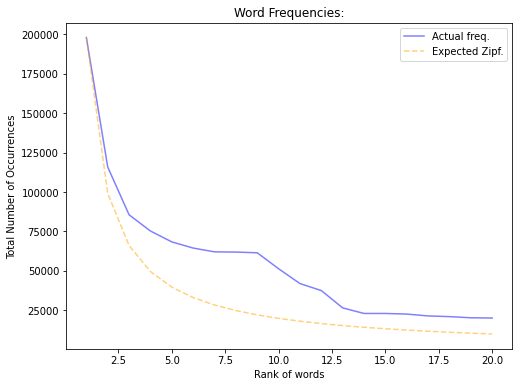

In [165]:
  print (len (text))

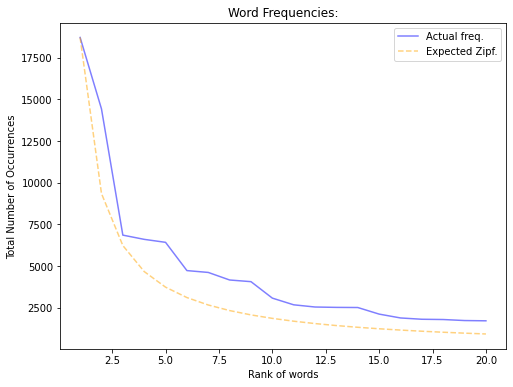

In [254]:
text_freq = topWordFrequencies ( text , 50) # TODO: calcular frecuencias 

In [255]:
text_zipf_table = createZipfTable (text_freq) # TODO: calcular tabla Zipf

In [256]:
print("|Rank|    Word    |       Freq | Zipf Frac  | Zipf Freq  |")
format_string = "|{:4}|{:12}|{:12.0f}|{:>12}|{:12.2f}|"
for index, item in enumerate(text_zipf_table,start=1):
        print(format_string.format(index,
                                   item["word"],
                                   item["actual_frequency"],
                                   item["relative_frequency"],
                                   item["zipf_frequency"]))

|Rank|    Word    |       Freq | Zipf Frac  | Zipf Freq  |
|   1|            |     2000723|         1/1|  2000723.00|
|   2|e           |     1119617|         1/2|  1000361.50|
|   3|t           |      827161|         1/3|   666907.67|
|   4|a           |      731203|         1/4|   500180.75|
|   5|o           |      678136|         1/5|   400144.60|
|   6|h           |      650743|         1/6|   333453.83|
|   7|n           |      615091|         1/7|   285817.57|
|   8|i           |      577691|         1/8|   250090.38|
|   9|s           |      556863|         1/9|   222302.56|
|  10|r           |      502402|        1/10|   200072.30|
|  11|d           |      400494|        1/11|   181883.91|
|  12|l           |      375313|        1/12|   166726.92|
|  13|
           |      256893|        1/13|   153901.77|
|  14|u           |      252211|        1/14|   142908.79|
|  15|m           |      230032|        1/15|   133381.53|
|  16|f           |      209239|        1/16|   125045.1

In [257]:
# TODO Representar gráficamente

ranks = list (range ( 1, 1+len (text_zipf_table) ))
frequencies = [ rec['actual_frequency']  for rec in text_zipf_table ]
zipf_frequencies = [ rec['zipf_frequency'] for rec in text_zipf_table ] 

plt.figure(figsize=(8,6))

plt.title("Word Frequencies:")
plt.ylabel("Total Number of Occurrences")
plt.xlabel("Rank of words")

plt.plot(
    ranks,
    frequencies, color='blue', label='Actual freq.',
    alpha=0.5
  )


plt.plot(
    ranks,
    zipf_frequencies, color="orange", label='Expected Zipf.',linestyle='--',
    alpha=0.5
  )

plt.legend()

**¿Cual de las dos curvas se aproxima más a una distribución Zipfianica?**
